Produire les moyennes de couleurs de chaque image CT (scan).  
Afficher les histogrammes par condition.

_Résultat_:
l'histogramme des images COVID paraît asymétrique contrairement aux autres groupes. Cela paraît difficile à interpréter sans refaire les masques. Ceci pourrait être:
* un vrai effet, où les poumons augmentent chez certaines personnes en réaction à la maladie
* ou un effet de l'algo, où les poumons malades se confondent facilement avec les autres organes.


In [9]:
import os
import matplotlib.image as mpimg
import numpy as np
import time
import pandas as pd

# from functools import partial

import matplotlib.pyplot as plt

In [10]:
DIM_NAMES = ['Height', 'Width']
DIM_NAMES3 = ['Height', 'Width', 'Color']

In [11]:
# Fonctions purement techniques
# pour passer du chemin vers un dossier d'images
# et d'une fonction d'extraction de descripteurs
#
# à une DF avec les numéros des images et descripteurs.

def fname_num(fname: str):
    """
    'Type'_'num'.png
    (str)
    ->
    num (integer)
    
    Example:
    >>> fname_num("Viral Pneumonia-42.png")
    42
    """
    str_num = fname.split('.')[0].split('-')[-1]
    return int(str_num)


def path2DF_iter_im(path_folder):
    """
    path to folder with images
    ->

    iterator of tuples:
    image numbers, images (matrices or tensors)

    in desorder.
    """
    file_names = os.listdir(path=path_folder)
    iter_images = ((fname_num(fname), mpimg.imread(os.path.join(path_folder, fname))) for fname in file_names)
    return iter_images


def extract_feat_2DF(fun_feat, iter_img, feat_names):
    """
    path to folder with N images
    ->

    DF (N * features) with:
    image number as index, 
    features as data
    """

    lst_num_shape = [(id_mat[0], fun_feat(id_mat[1])) for id_mat in iter_img]
    # list of (index, arrays of features)
    
    # Conversion dict -> sorted DF
    dict_num_shape = dict(lst_num_shape)
    df_shapes = pd.DataFrame.from_dict(dict_num_shape, orient='index', columns=feat_names)
    df_shapes = df_shapes.sort_index()
    return df_shapes


In [12]:
# Fonctions liées à l'extraction de données spécifiques à cet exercice:
# la luminosité moyenne d'une image
# (moyenne de tous les pixels par image).


def path2DF_colors(path_folder):
    """
    The main function.
    
    path to folder with images
    ->
    DF (N * 3) with:
    image number as index, 
    sizes as data

    The column 'Color' equals zero if an image is encoded without info of Color.
    """
    return extract_feat_2DF(lambda mat: (mat.mean()),
                            path2DF_iter_im(path_folder),
                            ['Mean_luminosity'])


Test des luminoisités moyennes des masques COVID 

In [13]:
condition_2plot_COV = "COVID"
path_dir_images = os.path.join("../data", condition_2plot_COV, "masks")

In [14]:
start = time.time()
luminosity_COV = path2DF_colors(path_dir_images)
done = time.time()

elapsed = done - start
print(f'time = {elapsed:.2f} sec \n\n')  # 5 sec


print(luminosity_COV.shape)  # (3616, 3)
luminosity_COV.head()


time = 2.16 sec 


(3616, 1)


,Mean_luminosity
1,0.234360
2,0.247360
3,0.264969
4,0.302048
5,0.247620


Séries et histogrammes de toutes les conditions. 

In [15]:
conditions = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

time = 12.59 sec 




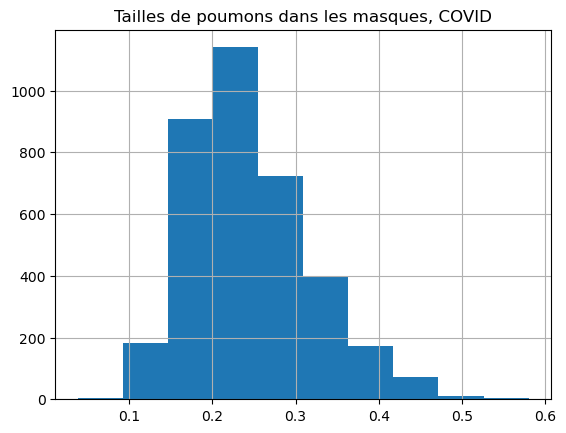

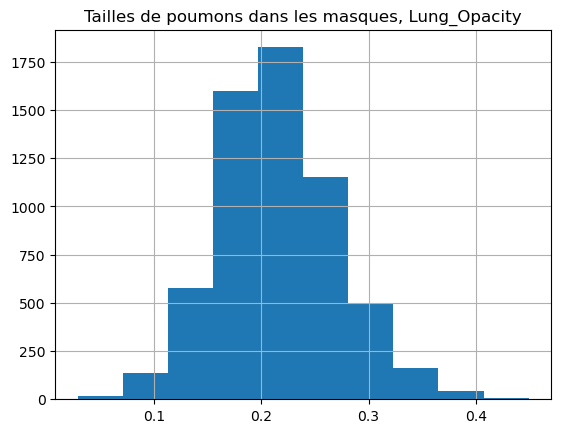

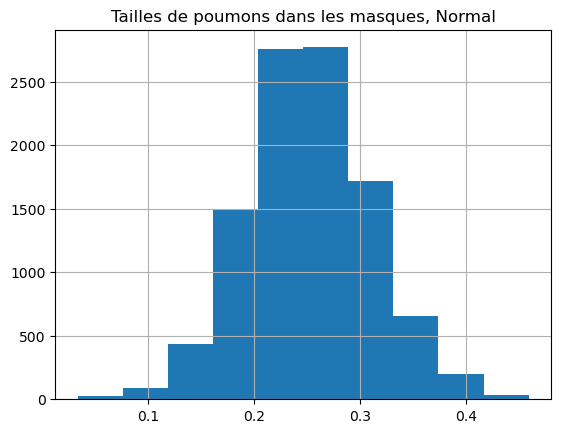

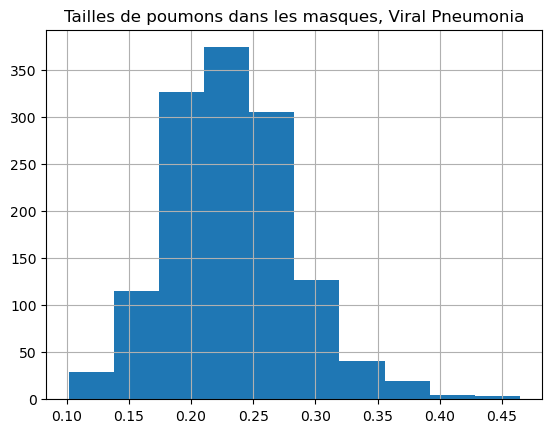

In [16]:
start = time.time()
for cond in conditions:
    path_dir_images = os.path.join("../data", cond, "masks")
    df_luminosity = path2DF_colors(path_dir_images)
    plt.figure()
    plt.hist(df_luminosity.iloc[:, 0])
    # df_luminosity.iloc[:, 0] :
    # Series des luminosités moyennes des images de la condition donnée.
    
    plt.title("Tailles de poumons dans les masques, " + cond)
    plt.grid()
done = time.time()

elapsed = done - start
print(f'time = {elapsed:.2f} sec \n\n')  # 38 sec